**Exercise 7.31**.  Simulate a time series of length $n = 48$ from an AR(1) model with $\phi = 0.7$. Use that series as if it were real data.  Now compare the theoretical asymptotic distribution of the estimator of $\phi$ with the distribution of the bootstrap estimator of $\phi$.

**Solution**.

In [1]:
set.seed(0)

Y = arima.sim(model=list(ar=0.7), n=48)
model_ar1 = arima(Y, order=c(1,0,0))

In [2]:
model_ar1


Call:
arima(x = Y, order = c(1, 0, 0))

Coefficients:
         ar1  intercept
      0.6985    -0.2078
s.e.  0.0992     0.4090

sigma^2 estimated as 0.7986:  log likelihood = -63.05,  aic = 132.09

In [3]:
B = 10000
estimates = rep(NA, B)

phi_hat = model_ar1$coef[[1]]
n = length(Y)

set.seed(1)
pb = txtProgressBar(1, B, style=3)
for (i in 1:B) {
    estimates[i] = arima(arima.sim(model=list(ar=phi_hat), n=n), order=c(1,0,0), method='ML')$coef[[1]]
    setTxtProgressBar(pb, i)
}

  |======================================================================| 100%

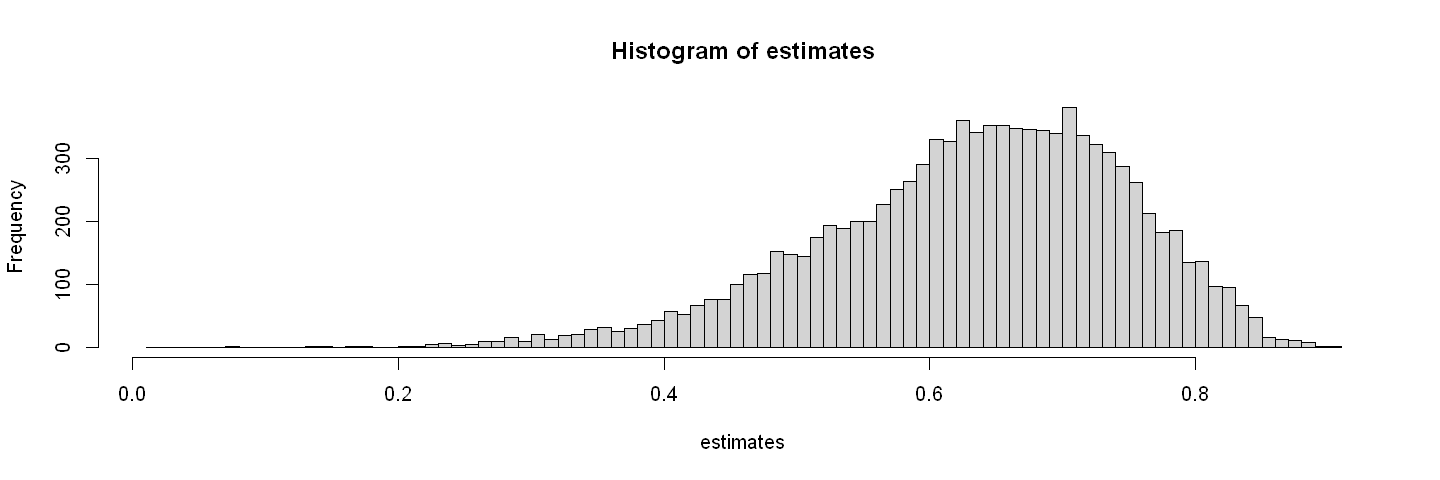

In [4]:
options(repr.plot.width=12, repr.plot.height=4)

hist(estimates, breaks=100)

In [5]:
print(c('Bootstrap estimate mean: ', round(mean(estimates), 3)), quote=F)
print(c('Bootstrap estimate SE:   ', round(sqrt(var(estimates)), 3)), quote=F)
print(c('5% percentile:           ', round(quantile(estimates, 0.05)[[1]], 3)), quote=F)
print(c('95% percentile:          ', round(quantile(estimates, 0.95)[[1]], 3)), quote=F)

[1] Bootstrap estimate mean:  0.633                    
[1] Bootstrap estimate SE:    0.116                    
[1] 5% percentile:            0.424                    
[1] 95% percentile:           0.8                      


The bootstrap estimate has a standard error of 0.116, somewhat above the original model standard error of 0.0992.

**Exercise 7.32**.  The industrial color property time series was fitted quite well by an AR(1) model.  However, the series is rather short, with $n = 35$. Compare the theoretical asymptotic distribution of the estimator of φ with the distribution of the bootstrap estimator of $\phi$. The data are in the file named `color`.

**Solution**.

In [6]:
Y <- read.csv('../data/color.dat')[['color']]

In [7]:
model_ar1 = arima(Y, order=c(1,0,0))
model_ar1


Call:
arima(x = Y, order = c(1, 0, 0))

Coefficients:
         ar1  intercept
      0.5705    74.3293
s.e.  0.1435     1.9151

sigma^2 estimated as 24.83:  log likelihood = -106.07,  aic = 218.15

In [8]:
B = 10000
estimates = rep(NA, B)

phi_hat = model_ar1$coef[[1]]
n = length(Y)

set.seed(1)
pb = txtProgressBar(1, B, style=3)
for (i in 1:B) {
    estimates[i] = arima(arima.sim(model=list(ar=phi_hat), n=n), order=c(1,0,0), method='ML')$coef[[1]]
    setTxtProgressBar(pb, i)
}

  |======================================================================| 100%

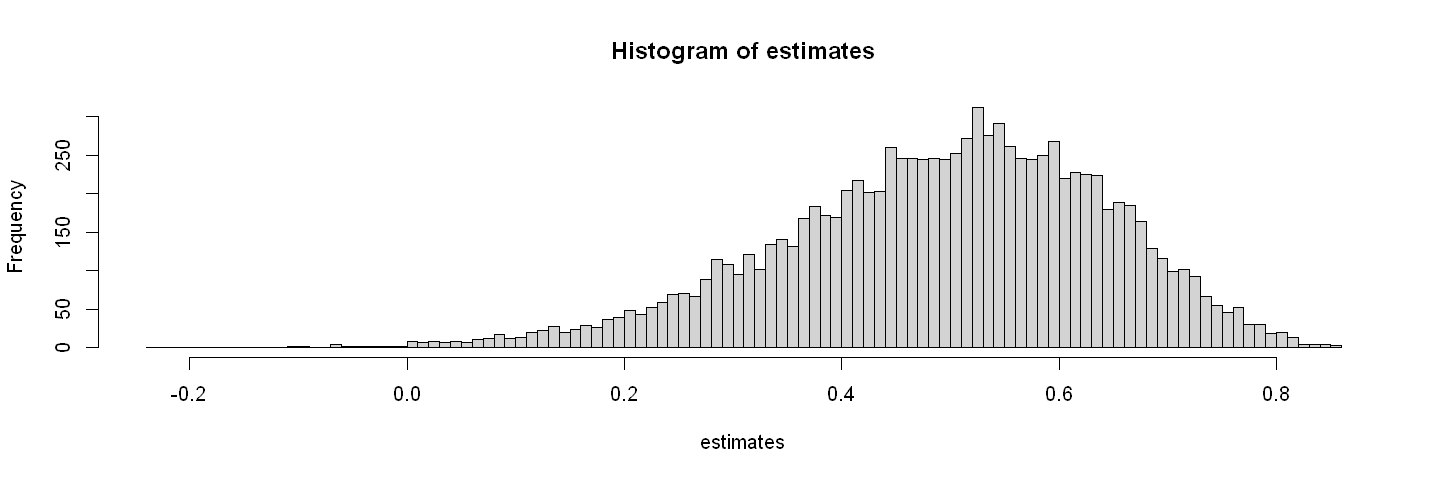

In [9]:
options(repr.plot.width=12, repr.plot.height=4)

hist(estimates, breaks=100)

In [10]:
print(c('Bootstrap estimate mean: ', round(mean(estimates), 3)), quote=F)
print(c('Bootstrap estimate SE:   ', round(sqrt(var(estimates)), 3)), quote=F)
print(c('5% percentile:           ', round(quantile(estimates, 0.05)[[1]], 3)), quote=F)
print(c('95% percentile:          ', round(quantile(estimates, 0.95)[[1]], 3)), quote=F)

[1] Bootstrap estimate mean:  0.492                    
[1] Bootstrap estimate SE:    0.15                     
[1] 5% percentile:            0.226                    
[1] 95% percentile:           0.714                    


The bootstrap estimate has a standard error of 0.15, slightly above the original fit standard error of 0.1435.